Group 26 group project 

Title: Classification Prediction - Do You Have Diabetes?

In [3]:
install.packages("cowplot")
library(tidyverse)
library(cowplot)
library(scales)
library(repr)
library(tidymodels)
library(rvest)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
diabetes <- read_csv("diabetes.csv", col_names = TRUE)
head(diabetes)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [8]:
diabetes <- diabetes |> mutate(Outcome = as_factor(Outcome), 
                               Age = as.integer(Age), 
                               Pregnancies = as.integer(Pregnancies)) |> 
            mutate(Outcome = fct_recode(Outcome, "Confirmed" = "1", "Healthy" = "0")) |>
            na.omit()
head(diabetes)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Outcome = fct_recode(Outcome, Confirmed = "1", Healthy = "0")`.
Caused by warning:
! Unknown levels in `f`: 1, 0”


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
6,148,72,35,0,33.6,0.627,50,Confirmed
1,85,66,29,0,26.6,0.351,31,Healthy
8,183,64,0,0,23.3,0.672,32,Confirmed
1,89,66,23,94,28.1,0.167,21,Healthy
0,137,40,35,168,43.1,2.288,33,Confirmed
5,116,74,0,0,25.6,0.201,30,Healthy


In [9]:
diabetes_split <- initial_split(diabetes, prop = 0.75, strata = "Outcome")
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)

In [10]:
Observations_by_class <- diabetes_training |> 
                            group_by(Outcome) |> 
                            summarize(count = n())
Observations_by_class

Outcome,count
<fct>,<int>
Healthy,375
Confirmed,201


As seen from above, we don't have a large class imbalance among the two outcome values. We are planning to use Glucose, BloodPressure, SkinThickness, and BMI as the main predictor variables as these variables are less skewed in value and follows a normal distribution among the data set. We also decided to use Age is we hypothesize that this variable might sinificantly impact the result where a Pima Indians are diagnosed with diabetes.

In [28]:
#To find the average value of each Predictor Variables for each class
Mean_values <- diabetes_training |> 
                select(-Pregnancies, -Insulin, -DiabetesPedigreeFunction) |>
                group_by(Outcome) |>
                summarize(across(Glucose:Age, mean)) 
Mean_values

#To find the maximum value of each Predictor Variables for each class
Max_values <- diabetes_training |> 
                select(-Pregnancies, -Insulin, -DiabetesPedigreeFunction) |>
                group_by(Outcome) |>
                summarize(across(Glucose:Age, max)) 
Max_values

#To find the minimum value of each Predictor Variables for each class
Min_values <- diabetes_training |> 
                select(-Pregnancies, -Insulin, -DiabetesPedigreeFunction) |>
                group_by(Outcome) |>
                summarize(across(Glucose:Age, min)) 
Min_values

Outcome,Glucose,BloodPressure,SkinThickness,BMI,Age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Healthy,109.136,68.68000,20.3600,30.33280,31.048
Confirmed,140.791,70.64179,23.1791,35.12836,36.801


Outcome,Glucose,BloodPressure,SkinThickness,BMI,Age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Healthy,197,122,60,57.3,81
Confirmed,199,114,99,67.1,67


Outcome,Glucose,BloodPressure,SkinThickness,BMI,Age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Healthy,0,0,0,0,21
Confirmed,0,0,0,0,21


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


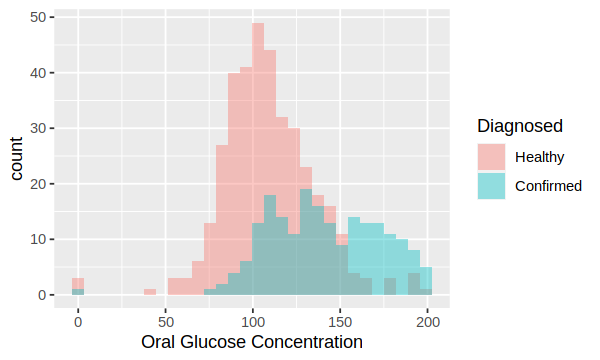

In [53]:
options(repr.plot.width = 5, repr.plot.height = 3)
Glucose_concentration_distribution <- ggplot(diabetes_training, aes(x = Glucose, fill = Outcome)) +
                                        geom_histogram(alpha = 0.4, position = "identity") +
                                        labs(x = "Oral Glucose Concentration", fill = "Diagnosed")
Glucose_concentration_distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


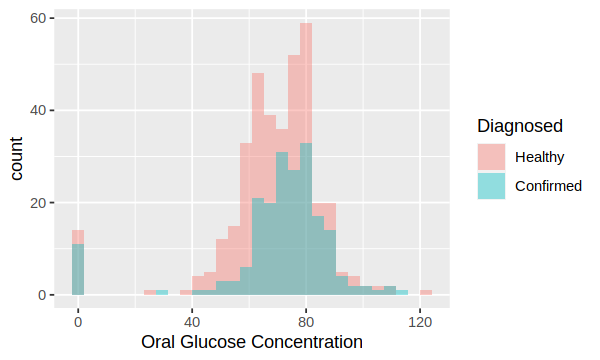

In [54]:
options(repr.plot.width = 5, repr.plot.height = 3)
BP_distribution <- ggplot(diabetes_training, aes(x = BloodPressure, fill = Outcome)) +
                                        geom_histogram(alpha = 0.4, position = "identity") +
                                        labs(x = "Oral Glucose Concentration", fill = "Diagnosed")
BP_distribution

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 3)
Glucose_concentration_distribution <- ggplot(diabetes_training, aes(x = Glucose, fill = Outcome)) +
                                        geom_histogram(alpha = 0.4, position = "identity") +
                                        labs(x = "Oral Glucose Concentration", fill = "Diagnosed")
Glucose_concentration_distribution